In [1]:
# data libraries
import numpy as np
import pandas as pd

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

# notebook display settings
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500

# warning settings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Data
df = pd.read_csv("train.csv")
df.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


## Cleaning Data

In [3]:
# Missing Data
pd.DataFrame(df.isnull().sum())

,0
Year_Factor,0
State_Factor,0
building_class,0
facility_type,0
floor_area,0
year_built,1837
energy_star_rating,26709
ELEVATION,0
january_min_temp,0
january_avg_temp,0


In [15]:
# Dummy Variables

df_facility_dummy = pd.get_dummies(df, columns = ["facility_type", "State_Factor"])
df_facility_dummy.head()

,Year_Factor,building_class,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id,facility_type_2to4_Unit_Building,facility_type_5plus_Unit_Building,facility_type_Commercial_Other,facility_type_Commercial_Unknown,facility_type_Data_Center,facility_type_Education_College_or_university,facility_type_Education_Other_classroom,facility_type_Education_Preschool_or_daycare,facility_type_Education_Uncategorized,facility_type_Food_Sales,facility_type_Food_Service_Other,facility_type_Food_Service_Restaurant_or_cafeteria,facility_type_Food_Service_Uncategorized,facility_type_Grocery_store_or_food_market,facility_type_Health_Care_Inpatient,facility_type_Health_Care_Outpatient_Clinic,facility_type_Health_Care_Outpatient_Uncategorized,facility_type_Health_Care_Uncategorized,facility_type_Industrial,facility_type_Laboratory,facility_type_Lodging_Dormitory_or_fraternity_sorority,facility_type_Lodging_Hotel,facility_type_Lodging_Other,facility_type_Lodging_Uncategorized,facility_type_Mixed_Use_Commercial_and_Residential,facility_type_Mixed_Use_Predominantly_Commercial,facility_type_Mixed_Use_Predominantly_Residential,facility_type_Multifamily_Uncategorized,facility_type_Nursing_Home,facility_type_Office_Bank_or_other_financial,facility_type_Office_Medical_non_diagnostic,facility_type_Office_Mixed_use,facility_type_Office_Uncategorized,facility_type_Parking_Garage,facility_type_Public_Assembly_Drama_theater,facility_type_Public_Assembly_Entertainment_culture,facility_type_Public_Assembly_Library,facility_type_Public_Assembly_Movie_Theater,facility_type_Public_Assembly_Other,facility_type_Public_Assembly_Recreation,facility_type_Public_Assembly_Social_meeting,facility_type_Public_Assembly_Stadium,facility_type_Public_Assembly_Uncategorized,facility_type_Public_Safety_Courthouse,facility_type_Public_Safety_Fire_or_police_station,facility_type_Public_Safety_Penitentiary,facility_type_Public_Safety_Uncategorized,facility_type_Religious_worship,facility_type_Retail_Enclosed_mall,facility_type_Retail_Strip_shopping_mall,facility_type_Retail_Uncategorized,facility_type_Retail_Vehicle_dealership_showroom,facility_type_Service_Drycleaning_or_Laundry,facility_type_Service_Uncategorized,facility_type_Service_Vehicle_service_repair_shop,facility_type_Warehouse_Distribution_or_Shipping_center,facility_type_Warehouse_Nonrefrigerated,facility_type_Warehouse_Refrigerated,facility_type_Warehouse_Selfstorage,facility_type_Warehouse_Uncategorized,State_Factor_State_1,State_Factor_State_10,State_Factor_State_11,State_Factor_State_2,State_Factor_State_4,State_Factor_State_6,State_Factor_State_8
0,1,Commercial,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,Commercial,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,4

In [ ]:
# Remove Duplicates
df_dropped = df.drop_duplicates()

In [16]:
# Create New Columns
df["december_range_temp"] = df.december_max_temp - df.december_min_temp

df["december_range_temp"]

0        35
1        35
2        35
3        35
4        35
         ..
75752    27
75753    27
75754    31
75755    31
75756    24
Name: december_range_temp, Length: 75757, dtype: int64

In [18]:
# Converting Data Types
df["january_min_temp"] = pd.to_numeric(df["january_min_temp"])

# Converting to DateTime
# not applicable here but
# df["X"] = pd.to_datetime(df["X"])

In [24]:
# Scaling/Standardizing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df_scale = df.copy()

# continuous column types
num = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# continuous columns
continuous = [c for c in df.columns if df[c].dtype in num]
categorical = [c for c in df.columns if df[c].dtype == "object"]

# z score
z = StandardScaler()
df_scale[continuous] = z.fit_transform(df_scale[continuous])

print(df_scale[continuous].head())



   Year_Factor  floor_area  year_built  energy_star_rating  ELEVATION  \
0     -2.28876   -0.424272   -0.278160           -1.746081  -0.611748   
1     -2.28876    0.437535    0.072685           -0.559899  -0.621640   
2     -2.28876    0.461940   -0.035267            1.254262  -0.621640   
3     -2.28876   -0.448240    0.747388           -0.525011  -0.621640   
4     -2.28876   -0.404999    0.882328            1.358925  -0.611748   

   january_min_temp  january_avg_temp  january_max_temp  february_min_temp  \
0          2.618884          2.314092          1.670279           1.850925   
1          2.618884          2.314092          1.670279           1.850925   
2          2.618884          2.314092          1.670279           1.850925   
3          2.618884          2.314092          1.670279           1.850925   
4          2.618884          2.314092          1.670279           1.850925   

   february_avg_temp  february_max_temp  march_min_temp  march_avg_temp  \
0           1.698

In [27]:
df_scale = df.copy()

# Min Max Scaling
x = MinMaxScaler()
df_scale[continuous] = x.fit_transform(df_scale[continuous])

print(df_scale[continuous].head())

   Year_Factor  floor_area  year_built  energy_star_rating  ELEVATION  \
0          0.0    0.009445    0.963772                0.11   0.004557   
1          0.0    0.042769    0.970223                0.45   0.004247   
2          0.0    0.043713    0.968238                0.97   0.004247   
3          0.0    0.008518    0.982630                0.46   0.004247   
4          0.0    0.010190    0.985112                1.00   0.004557   

   january_min_temp  january_avg_temp  january_max_temp  february_min_temp  \
0          0.808824          0.735725          0.530612           0.786885   
1          0.808824          0.735725          0.530612           0.786885   
2          0.808824          0.735725          0.530612           0.786885   
3          0.808824          0.735725          0.530612           0.786885   
4          0.808824          0.735725          0.530612           0.786885   

   february_avg_temp  february_max_temp  march_min_temp  march_avg_temp  \
0           0.720

In [28]:
# square root transform

df_scale["site_eui"] = np.sqrt(df_scale["site_eui"])

# log transform

df_scale["site_eui"] = np.log(df_scale["site_eui"])

## Data Visualization and Summarization

In [4]:
# summaries
df.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000,75757.000000
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,58.486278,21.606281,44.469292,70.897831,32.037171,53.784863,82.661932,44.706179,63.742547,88.987856,51.131763,71.066384,91.400280,60.571604,76.596879,95.543950,58.515068,75.348749,92.572581,50.791689,69.597545,92.171139,38.210911,58.727038,81.135671,28.630397,48.123133,71.202397,22.736777,41.625569,64.496852,1202.250446,4324.957390,42.430651,29.136379,164.862455,56.176705,48.756511,17.447932,4.886532,0.876764,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,8.414611,10.004303,6.657142,7.680982,5.577279,2.500473,4.101028,4.200319,2.792919,2.864669,3.415926,2.861681,3.604068,4.177109,4.090275,4.157118,4.441992,3.818895,4.139685,4.290884,3.603773,5.011708,5.093899,2.641300,5.579513,7.153244,4.094207,4.373374,9.014047,5.869386,6.054104,391.561780,824.366727,10.592205,17.810894,175.275869,2.241940,27.587124,14.469435,7.071221,2.894244,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403,21869.306509
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,38.000000,-9.000000,25.854839,53.000000,15.000000,40.280000,62.000000,23.000000,46.950000,64.000000,30.000000,54.100000,67.000000,37.000000,54.822581,65.000000,31.000000,56.693548,66.000000,26.000000,53.600000,64.000000,18.000000,44.693548,59.000000,4.000000,30.766667,53.000000,-16.000000,23.790323,42.000000,0.000000,398.000000,0.000000,0.000000,0.000000,44.512329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,55.000000,13.000000,38.096774,62.000000,26.000000,52.333333,80.000000,42.000000,62.790323,88.000000,50.000000,70.983333,89.000000,57.000000,76.145161,95.000000,57.000000,74.516129,90.000000,47.000000,68.200000,91.000000,35.000000,58.048387,78.000000,23.000000,45.250000,69.000000,17.000000,38.532258,60.000000,1128.000000,3978

In [5]:
df.groupby("building_class").size()

building_class
Commercial     32199
Residential    43558
dtype: int64

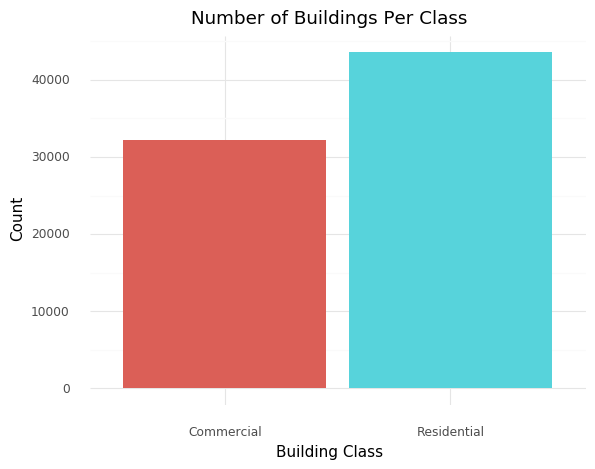

<ggplot: (8792803434996)>

In [6]:
# Bar Charts

## ggplot
(ggplot(df, aes(x = "building_class", fill = "building_class")) +
 geom_bar() +
  theme_minimal() +
  labs(x = "Building Class",
  y = "Count",
  title = "Number of Buildings Per Class") +
  theme(legend_position = "none"))

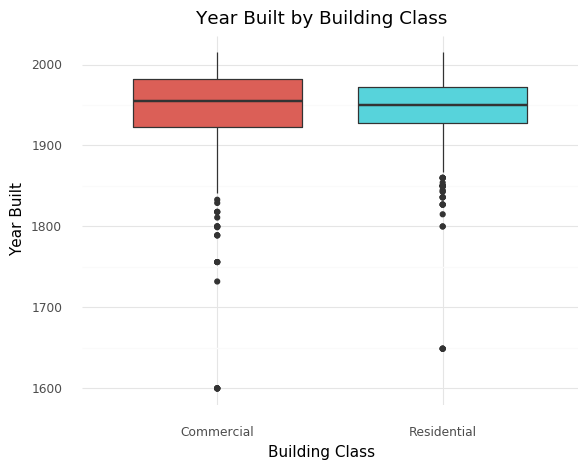

<ggplot: (8792779847150)>

In [7]:
# boxplots and violin plots

(ggplot(df.loc[df.year_built > 0], aes(y = "year_built", x = "building_class",
fill = "building_class")) +
geom_boxplot() + theme_minimal() +
labs(x = "Building Class", y = "Year Built",
title = "Year Built by Building Class") +
theme(legend_position = "none"))

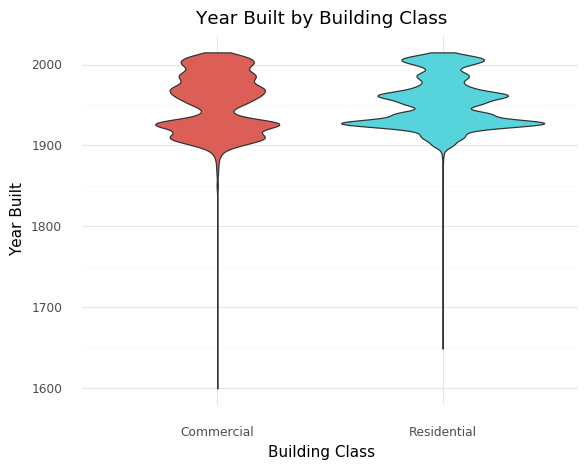

<ggplot: (8792779904570)>

In [8]:
(ggplot(df.loc[df.year_built > 0], aes(y = "year_built", x = "building_class",
fill = "building_class")) +
geom_violin() + theme_minimal() +
labs(x = "Building Class", y = "Year Built",
title = "Year Built by Building Class") +
theme(legend_position = "none"))

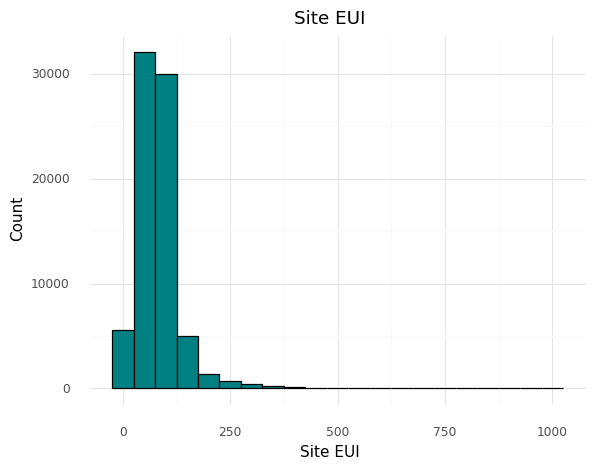

<ggplot: (8792779911921)>

In [9]:
# histograms
(ggplot(df, aes(x = "site_eui")) +
geom_histogram(fill = "teal", color = "black", binwidth = 50) +
 theme_minimal() +
labs(x = "Site EUI", y = "Count",
title = "Site EUI") +
theme(legend_position = "none"))

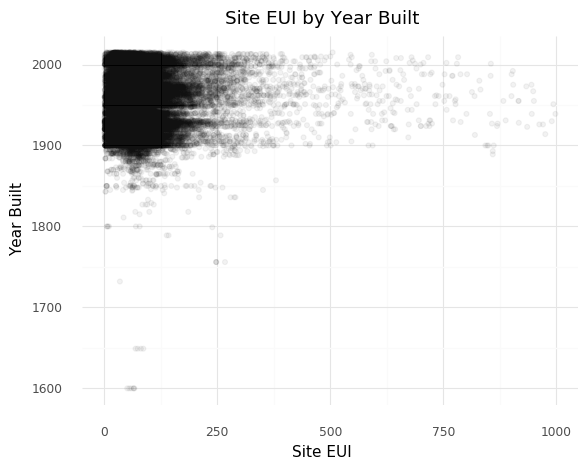

<ggplot: (8792779868639)>

In [10]:
# scatterplot
(ggplot(df.loc[df.year_built > 0], aes(x = "site_eui", y = "year_built")) +
geom_point(alpha = 0.05) +
 theme_minimal() +
labs(x = "Site EUI", y = "Year Built",
title = "Site EUI by Year Built") +
theme(legend_position = "none"))

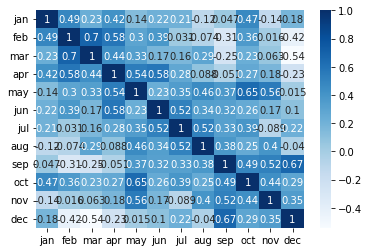

In [11]:
# correlation plot

# only grab monthly max temps
max_temps = [c for c in df.columns if c.endswith("max_temp")]
df_sub = df[max_temps]
df_sub.columns = [x.split("_")[0][0:3] for x in df_sub.columns]

# correlation plot
sns.heatmap(df_sub.corr(), cmap="Blues", annot=True)


## Missing Data Handling

In [12]:
# Missing Data Removal

# Complete Cases
df_complete = df.dropna()
df_complete.reset_index(inplace = True)

df_complete.isnull().sum()

index                        0
Year_Factor                  0
State_Factor                 0
building_class               0
facility_type                0
floor_area                   0
year_built                   0
energy_star_rating           0
ELEVATION                    0
january_min_temp             0
january_avg_temp             0
january_max_temp             0
february_min_temp            0
february_avg_temp            0
february_max_temp            0
march_min_temp               0
march_avg_temp               0
march_max_temp               0
april_min_temp               0
april_avg_temp               0
april_max_temp               0
may_min_temp                 0
may_avg_temp                 0
may_max_temp                 0
june_min_temp                0
june_avg_temp                0
june_max_temp                0
july_min_temp                0
july_avg_temp                0
july_max_temp                0
august_min_temp              0
august_avg_temp              0
august_m

In [13]:
# Pairwise Deletion

# only delete rows that are missing values in one of these columns
df_sub = df[["direction_max_wind_speed", "direction_peak_wind_speed"]].dropna()
df_sub.corr()

,direction_max_wind_speed,direction_peak_wind_speed
direction_max_wind_speed,1.000000,0.999784
direction_peak_wind_speed,0.999784,1.000000


In [14]:
# Imputation

# more here: https://scikit-learn.org/stable/modules/impute.html

from sklearn.impute import SimpleImputer

df_impute = df.copy()

# continuous column types
num = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# continuous columns
continuous = [c for c in df.columns if df[c].dtype in num]
categorical = [c for c in df.columns if df[c].dtype == "object"]

## mean
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(df[continuous])

df_impute[continuous] = imp.transform(df[continuous])

## most frequent
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(df[categorical])

df_impute[categorical] = imp.transform(df[categorical])

df_impute_nulls = df_impute.isnull().sum()
df_nulls = df.isnull().sum()

nulls = pd.DataFrame({"original": df_nulls,
"imputes": df_impute_nulls})

nulls


,original,imputes
Year_Factor,0,0
State_Factor,0,0
building_class,0,0
facility_type,0,0
floor_area,0,0
year_built,1837,0
energy_star_rating,26709,0
ELEVATION,0,0
january_min_temp,0,0
january_avg_temp,0,0
